<a href="https://colab.research.google.com/github/Linus711/ML3/blob/main/2487_Assignment3_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The assignment 3 contains 1 question and the due date is April 28th (Sunday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 How Yelp Uses Deep Learning to Classify Business Photos? (100 points)

Yelp hosts tens of millions of photos uploaded by Yelpers from all around the world. The wide variety of these photos provides a rich window into local businesses, a window we’re only just peeking through today.

One way we’re trying to open that window is by developing a photo understanding system which allows us to create semantic data about individual photographs. The data generated by the system has been powering our recent launch of tabbed photo browsing as well as our first attempts at content-based photo diversification.

You can check more details about Yelp's practices at [here](https://engineeringblog.yelp.com/2015/10/how-we-use-deep-learning-to-classify-business-photos-at-yelp.html)


![food](https://engineeringblog.yelp.com/images/posts/2015-10-14-photo-classification/image02.png)


In this question, you will be asked to building a Photo Classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from PIL import Image
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


Let's first upload the file images.npy and labels.npy and load the images dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
images = np.load('/content/drive/MyDrive/Assignment3_DL_2324/images.npy')
labels = np.load('/content/drive/MyDrive/Assignment3_DL_2324/labels.npy')


print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels match the image at the respective 0 to 1024 position.')

Images shape: (1024, 256, 256, 3)
Labels shape: (1024,)
Labels match the image at the respective 0 to 1024 position.


There are four types of the images on Yelp: Food, Drink, Interior and Exterior

In [5]:
np.unique(labels)

array([0, 1, 2, 3])

We visualize some random images from the dataset below:

In [6]:
class_names = ['Drinks', 'Food', 'Interior', 'Exterior']

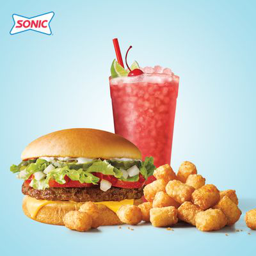

In [7]:
# food: class 0

Image.fromarray(images[5])

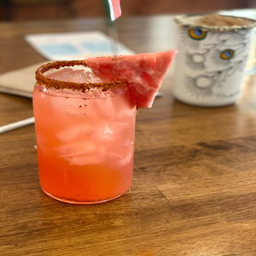

In [8]:
# drink: class 1

Image.fromarray(images[3])

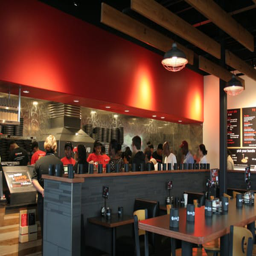

In [9]:
# interior: class 2

Image.fromarray(images[7])

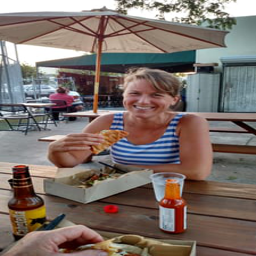

In [10]:
# exterior: class 3

Image.fromarray(images[8])

### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the Yelp image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [11]:
batch_size = 32
img_height = 256
img_width = 256
num_classes= 4

In [12]:
# Split the dataset into training, validation, and test sets
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
normalization_layer = layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

train_ds_size = int(0.8 * len(images))
val_ds_size = int(0.10 * len(images))
test_ds_size = len(images) - train_ds_size - val_ds_size

# Shuffle only the training dataset
train_ds = dataset.take(train_ds_size).shuffle(buffer_size=train_ds_size, seed=42)
val_ds = dataset.skip(train_ds_size).take(val_ds_size)
test_ds = dataset.skip(train_ds_size + val_ds_size)

# Batch and prefetch the datasets
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.initializers import glorot_uniform
# Constant
INPUT_SHAPE = (256, 256, 3)
LAYERS = 20
NEURONS = 100
OUTPUT_NEURONS = np.unique(labels).size
EPOCHS = 100
WEIGHT_INITIALIZER = glorot_uniform(seed=42)



# Build the model

def build_model(INPUT_SHAPE, LAYERS, NEURONS, OUTPUT_NEURONS):
    model = Sequential()
    model.add(layers.Flatten(input_shape=INPUT_SHAPE))
    model.add(layers.Dense(NEURONS, activation='relu'))
    for _ in range(LAYERS - 1):
        model.add(layers.Dense(NEURONS, activation='relu', kernel_initializer=WEIGHT_INITIALIZER))
    model.add(layers.Dense(OUTPUT_NEURONS, activation='softmax'))

    # Model summary
    model.summary()

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

    # Train the model
    history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=(val_ds))

    return model, history

# Call the function to build and train the model
model, history = build_model(INPUT_SHAPE, LAYERS, NEURONS, OUTPUT_NEURONS)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 196608)            0         
                                                                 
 dense_100 (Dense)           (None, 100)               19660900  
                                                                 
 dense_101 (Dense)           (None, 100)               10100     
                                                                 
 dense_102 (Dense)           (None, 100)               10100     
                                                                 
 dense_103 (Dense)           (None, 100)               10100     
                                                                 
 dense_104 (Dense)           (None, 100)               10100     
                                                                 
 dense_105 (Dense)           (None, 100)             

In [ ]:
model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(img_height, img_width, 3)))
model.add(layers.Flatten())

for _ in range(20):
    model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to see the number of parameters
model.summary()

# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 196608)            0         
                                                                 
 dense_50 (Dense)            (None, 100)               19660900  
                                                                 
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 100)               10100     
                                                                 
 dense_53 (Dense)            (None, 100)               10100     
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 100)             

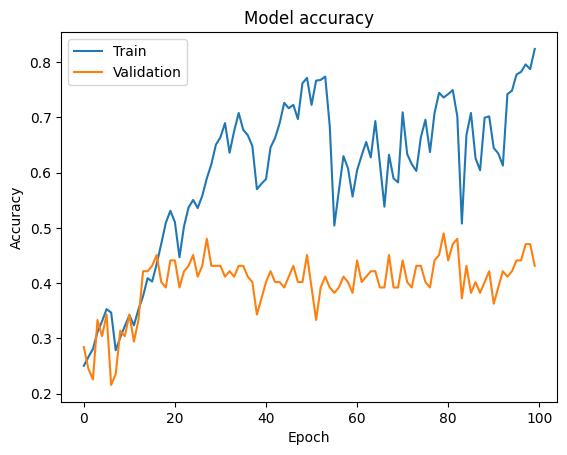

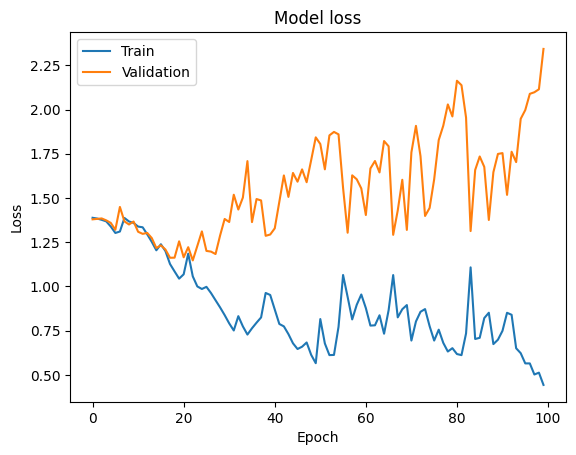

4/4 [==============================] - 0s 20ms/step - loss: 2.4793 - accuracy: 0.3301
Train accuracy: 0.8241758346557617
Test accuracy: 0.3300970792770386


In [ ]:
def plot_history(history):
    # Plot training & validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to plot history
plot_history(history)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Results

The model comprises 19,853,204 parameters, which are iteratively adjusted during training to minimize the loss function. These parameters capture the model's internal representations, allowing it to learn patterns from the data

**Overfitting:**

Significant differences in training, validation and test accuracies and losses are indicators of overfitting. The above model resulted in a train accuracy of 0.82, a validation accuracy of 0.43 and a test accuracy of 0.33. The accuarcies are clear indication that our model is overfitting, this is underlined by the diverging lines in the above plots.

- **Loss Curves:** The training loss consistently decreases with each epoch, indicating the model's improved fit to the training data over time. However, the validation loss shows an slightly increasing trend, suggesting a deterioration in the model's performance on unseen validation data. This divergence between training and validation loss is a hallmark of overfitting, where the model becomes overly specialized to the training data, hindering its ability to generalize.
- **Accuracy curves:** Similarly,the training accuracy is steadily increasing. However, the validation accuracy plateaus after approximately 20 epochs, indicating overfitting.

Having established our model's tendency to overfit, we will now explore some techniques which aid in reducing overfitting and help improve model performance. We aim to improve our current test accuracy of 0.33 by 10%.

### Question 1.2 (25 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

# Ablation Study

Look at various overfitting reducing techniques, specifically L1 and L2 regularization, Dropout, early stopping, augmentation and combinations of the techqniues, an ablation study is performed.

Since we are still working with 100 nodes, 20 layers and 100 epochs we will apply the early stopping technique with patience of 10 and a min_delta of 0.001 to all of our models. This is done out of computational considerations as well as overfitting reduction.

The train accuaracy, validation accuracy and test accuracy are evaluated to determine the optimal techniques to help achieve the 10% improvement

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Regularization strength
l1_strengths = [0.001, 0.01]
l2_strengths = [0.001, 0.01]

# Dropout rates
dropout_rates = [0.25, 0.5]

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model_list = []

# Technique 1: L1 Regularization
model_l1_001 = models.Sequential()
model_l1_001.add(layers.Input(shape=(img_height, img_width, 3)))
model_l1_001.add(layers.Flatten())
model_l1_001.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_l1_001.add(layers.Dense(num_classes, activation='softmax'))
model_l1_001.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
model_list.append((model_l1_001, 'L1 Regularization (strength=0.001)'))

model_l1_01 = models.Sequential()
model_l1_01.add(layers.Input(shape=(img_height, img_width, 3)))
model_l1_01.add(layers.Flatten())
model_l1_01.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_l1_01.add(layers.Dense(num_classes, activation='softmax'))
model_l1_01.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
model_list.append((model_l1_01, 'L1 Regularization (strength=0.01)'))

# Technique 2: L2 Regularization
model_l2_001 = models.Sequential()
model_l2_001.add(layers.Input(shape=(img_height, img_width, 3)))
model_l2_001.add(layers.Flatten())
model_l2_001.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2_001.add(layers.Dense(num_classes, activation='softmax'))
model_l2_001.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
model_list.append((model_l2_001, 'L2 Regularization (strength=0.001)'))

model_l2_01 = models.Sequential()
model_l2_01.add(layers.Input(shape=(img_height, img_width, 3)))
model_l2_01.add(layers.Flatten())
model_l2_01.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_l2_01.add(layers.Dense(num_classes, activation='softmax'))
model_l2_01.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
model_list.append((model_l2_01, 'L2 Regularization (strength=0.01)'))

# Technique 3: Dropout
model_dropout_025 = models.Sequential()
model_dropout_025.add(layers.Input(shape=(img_height, img_width, 3)))
model_dropout_025.add(layers.Flatten())
model_dropout_025.add(layers.Dropout(0.25))
model_dropout_025.add(layers.Dense(100, activation='relu'))
model_dropout_025.add(layers.Dense(num_classes, activation='softmax'))
model_dropout_025.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_list.append((model_dropout_025, 'Dropout (rate=0.25)'))

model_dropout_05 = models.Sequential()
model_dropout_05.add(layers.Input(shape=(img_height, img_width, 3)))
model_dropout_05.add(layers.Flatten())
model_dropout_05.add(layers.Dropout(0.5))
model_dropout_05.add(layers.Dense(100, activation='relu'))
model_dropout_05.add(layers.Dense(num_classes, activation='softmax'))
model_dropout_05.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
model_list.append((model_dropout_05, 'Dropout (rate=0.5)'))

# Technique 4: Early Stopping
model_early_stopping = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model_early_stopping.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])
model_list.append((model_early_stopping, 'Early Stopping (patience=10)'))

# Technique 5: Data Augmentation
model_data_augmentation = models.Sequential()
model_data_augmentation.add(data_augmentation)
model_data_augmentation.add(layers.Input(shape=(img_height, img_width, 3)))
model_data_augmentation.add(layers.Flatten())
model_data_augmentation.add(layers.Dense(100, activation='relu'))
model_data_augmentation.add(layers.Dense(num_classes, activation='softmax'))
model_data_augmentation.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])
model_list.append((model_data_augmentation, 'Data Augmentation (flip / rotation)'))

# Define the model with L2 regularization and dropout
model_l2_dropout = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
model_l2_dropout.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
model_list.append((model_l2_dropout, 'L2 Regularization + Dropout'))

# Define the model with data augmentation and L1 regularization
model_data_aug_l1 = models.Sequential([
    data_augmentation,
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(num_classes, activation='softmax')
])
model_data_aug_l1.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_list.append((model_data_aug_l1, 'Data Augmentation + L1 Regularization'))

# Define the model with dropout and L2 regularization
model_dropout_l2 = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(num_classes, activation='softmax')
])
model_dropout_l2.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
model_list.append((model_dropout_l2, 'Dropout + L2 Regularization'))

# Define the model with dropout and data augmentation
model_dropout_augmentation = models.Sequential([
    data_augmentation,
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model_dropout_augmentation.compile(optimizer='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])
model_list.append((model_dropout_augmentation, 'Dropout + Data Augmentation'))



In [ ]:
import pandas as pd

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model Name', 'Final Train Accuracy', 'Final Validation Accuracy', 'Final Test Accuracy'])

# Train each model
for model, technique_name in model_list:
    print(f"Training model with technique: {technique_name}")
    history = model.fit(train_ds,
                        validation_data=val_ds,
                        epochs=100,
                        callbacks=[early_stopping])

    # Extract final train, validation, and test accuracy
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    _, test_accuracy = model.evaluate(test_ds)

    # Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model Name': technique_name,
                                                      'Final Train Accuracy': final_train_accuracy,
                                                      'Final Validation Accuracy': final_val_accuracy,
                                                      'Final Test Accuracy': test_accuracy}, index=[0])],
                           ignore_index=True)

# Display the results DataFrame
display(results_df)

Training model with technique: L1 Regularization (strength=0.001)
Epoch 1/100
26/26 [==============================] - 2s 26ms/step - loss: 83.6276 - accuracy: 0.3150 - val_loss: 76.3370 - val_accuracy: 0.2451
Epoch 2/100
26/26 [==============================] - 1s 21ms/step - loss: 56.6189 - accuracy: 0.3370 - val_loss: 56.7651 - val_accuracy: 0.2745
Epoch 3/100
26/26 [==============================] - 1s 20ms/step - loss: 48.6227 - accuracy: 0.3443 - val_loss: 41.2650 - val_accuracy: 0.3725
Epoch 4/100
26/26 [==============================] - 1s 19ms/step - loss: 37.9535 - accuracy: 0.4103 - val_loss: 29.8748 - val_accuracy: 0.4314
Epoch 5/100
26/26 [==============================] - 0s 19ms/step - loss: 30.0348 - accuracy: 0.4750 - val_loss: 43.2211 - val_accuracy: 0.4020
Epoch 6/100
26/26 [==============================] - 0s 18ms/step - loss: 38.5714 - accuracy: 0.3797 - val_loss: 45.7317 - val_accuracy: 0.3627
Epoch 7/100
26/26 [==============================] - 0s 18ms/step - lo

,Model Name,Final Train Accuracy,Final Validation Accuracy,Final Test Accuracy
0,L1 Regularization (strength=0.001),0.413919,0.411765,0.398058
1,L1 Regularization (strength=0.01),0.267399,0.313726,0.203883
2,L2 Regularization (strength=0.001),0.758242,0.401961,0.407767
3,L2 Regularization (strength=0.01),0.567766,0.372549,0.359223
4,Dropout (rate=0.25),0.417582,0.382353,0.349515
5,Dropout (rate=0.5),0.616606,0.431373,0.466019
6,Early Stopping (patience=10),0.257631,0.215686,0.223301
7,Data Augmentation (flip / rotation),0.258852,0.215686,0.223301
8,L2 Regularization + Dropout,0.233211,0.225490,0.213592
9,Data Augmentation + L1 Regularization,0.393162,0.294118,0.262136


#Results of Ablation Study

The various models' accuracies are presented in the table above. Our baseline model had a test accuracy of 0.33, meaning to achieve the desired 10% improvement we are looking for a final test accuracy of at least 0.365. The following models achieved the desired 10% improvement.

- **L1 Regularization (strength=0.001)**: 0.40 Test Accuracy
- **L2 Regularization (strength=0.001)**: 0.41 Test Accuracy
- **Dropout (rate=0.5)**: 0.47 Test Accuracy


Overall, the study reveals that regularization techniques such as dropout, L1- & L2 regularization show promising effectiveness in improving model generalization and reducing overfitting. Dropout, particularly with a higher dropout rate, demonstrates significant improvements in generalization performance across different evaluation metrics.

Additionally, combining regularization techniques or integrating them with data augmentation strategies proved to not be vefy effective.

Furthermore, early stopping and data augmentation alone do not consistently improve model performance, suggesting that their effectiveness might be context-dependent or influenced by other factors.

In summary, the ablation study highlights the importance of incorporating appropriate regularization techniques, such as dropout and L1 & L2 regularization, to enhance model generalization and mitigate overfitting, while also acknowledging the nuanced impact of different combinations and strategies on model effectiveness.






### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to see the number of parameters
model.summary()

# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[early_stopping])


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 21, 21, 128)     

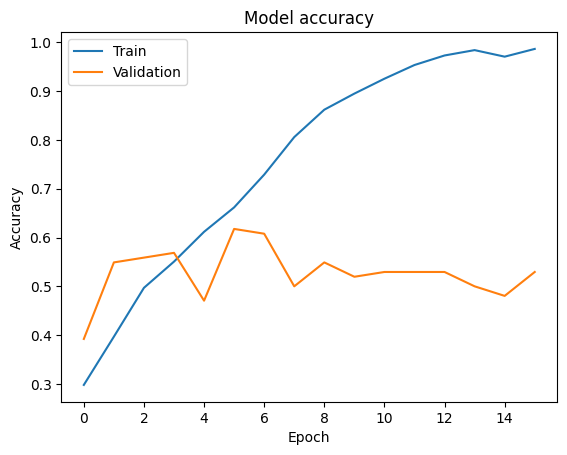

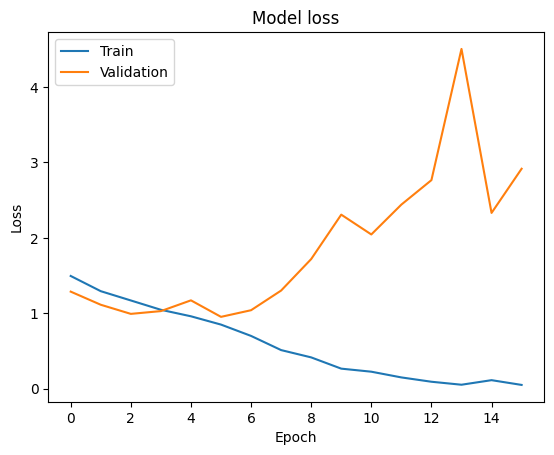

4/4 [==============================] - 0s 124ms/step - loss: 2.3913 - accuracy: 0.6505
Train accuracy: 0.9865689873695374
Test accuracy: 0.6504854559898376


In [ ]:
# Call the function to plot history
plot_history(history)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_ds)
train_accuracy = history.history['accuracy'][-1]
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# Results CNN

The Convolutional Neural Network (CNN) outperformed  Multilayer Perceptron (MLP) based on the reported test accuracy. A final test accuracy of 0.65 significantly outperforms our baseline test accuracy of 0.33 and our dropout model test accuracy of 0.47.

The early stopping kicked in at epoch 16.

CNN outperformed our other models for various reasons:

- CNNs excel in processing image data by applying filters to capture local patterns like edges and textures.
- Hierarchical feature learning: CNNs learn increasingly complex features from early layers detecting edges to deeper layers identifying shapes.
- Dropout regularization randomly sets input units to 0 during training, preventing overfitting and enhancing generalization.
- Reduced complexity: Convolution and pooling layers reduce spatial dimensions, minimizing parameters and preventing overfitting.


The CNN's superior performance in this image classification task reflects its prowess in handling image data. Its capability to capture spatial hierarchies and complexities aligns perfectly with the demands of the task.

### Question 1.4 Transfer learning (35 points)

In this question, we will use the several well-known architectures that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, these architectures have already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of model, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained models from `tensorflow.keras.applications`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

Try to use the following models: VGG16, Inception, ResNet, MobileNet and EfficientNet and compare their performance and running time. Explain which model would work the best.

In [21]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet_v2, efficientnet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers
import time

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

# Define dictionary of models and preprocessing functions
models = {
    'VGG16': (vgg16.VGG16, vgg16.preprocess_input),
    'InceptionV3': (inception_v3.InceptionV3, inception_v3.preprocess_input),
    'ResNet50': (resnet50.ResNet50, resnet50.preprocess_input),
    'MobileNetV2': (mobilenet_v2.MobileNetV2, mobilenet_v2.preprocess_input),
    'EfficientNetB0': (efficientnet.EfficientNetB0, efficientnet.preprocess_input)
}

# Function to load pretrained models
def load_pretrained_model(input_shape, model_name, models_dict):
    if model_name not in models_dict:
        raise ValueError(f"Unsupported model name. Please choose from {list(models_dict.keys())}")

    model_class, preprocess_input = models_dict[model_name]
    base_model = model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    base_model.summary()
    return base_model, preprocess_input

# Function to build transfer learning model
def build_transfer_learning_model(base_model):
    model = Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(500, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    return model

# Function to train and evaluate the model
def train_evaluate_model(model, train_ds, val_ds, test_ds, early_stopping):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[early_stopping])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(test_ds)
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    return history, train_accuracy, val_accuracy, test_accuracy

# Load data and initialize variables
input_shape = (img_height, img_width, 3)
results = {}

# Loop through each model
for model_name in models:
    print(f"Training and evaluating {model_name}...")

    # Load pretrained model
    base_model, preprocess_input = load_pretrained_model(input_shape, model_name, models)

    # Build transfer learning model
    transfer_model = build_transfer_learning_model(base_model)

    start_time = time.time()

    # Train and evaluate the model
    history, train_accuracy, val_accuracy, test_accuracy = train_evaluate_model(transfer_model, train_ds, val_ds, test_ds, early_stopping)

    end_time = time.time()
    total_time = end_time - start_time

    # Save results
    results[model_name] = {
        'Epochs': history.epoch[-1] + 1, # Number of epochs
        'Train Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy,
        'Total Training Time': total_time
    }

# Display results in a table
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df)


Training and evaluating VGG16...
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D) 

Training and evaluating MobileNetV2...
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_24[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128,

,VGG16,InceptionV3,ResNet50,MobileNetV2,EfficientNetB0
Epochs,17.000000,22.000000,16.000000,17.000000,11.000000
Train Accuracy,1.000000,1.000000,0.792430,1.000000,0.295482
Validation Accuracy,0.823529,0.921569,0.578431,0.931373,0.245098
Test Accuracy,0.902913,0.893204,0.650485,0.912621,0.359223
Total Training Time,123.106630,88.747156,72.752259,42.687543,48.884893


In [23]:
results_df

,VGG16,InceptionV3,ResNet50,MobileNetV2,EfficientNetB0
Epochs,17.000000,22.000000,16.000000,17.000000,11.000000
Train Accuracy,1.000000,1.000000,0.792430,1.000000,0.295482
Validation Accuracy,0.823529,0.921569,0.578431,0.931373,0.245098
Test Accuracy,0.902913,0.893204,0.650485,0.912621,0.359223
Total Training Time,123.106630,88.747156,72.752259,42.687543,48.884893


# Results
Five pre-trained architectures were applied to train the classification model:
1. VGG16
2. ResNet50
3. MobileNetV2
4. InceptionV3
5. EfficientNetB0

**Results**
The VGG16, Inception and MobileNet all performed very strongly relative to other architectures tested so far. All 3 achieving a test accuracy of above 90%. The **MobileNet achieved the highest test accuracy of 91.26%**. ResNet performed moderately, slightly worse than the CNN and finally, EfficientNet performed very bad with only 35% test accuracy. Further experimentation and optimization may be needed to improve its performance in this scenario.

Each model underwent training for a different number of epochs, ranging from 11 to 22. Despite the varying epochs, all models were subject to early stopping, which suggests that they reached a point of diminishing returns in terms of performance improvement. Notably, models like ResNet50 and MobileNetV2 exhibited shorter training times, around 72.75 seconds and 42.69 seconds respectively, likely due to their architecture's computational efficiency and optimized design, whereas VGG16 and InceptionV3, with training times of approximately 123.11 seconds and 88.75 seconds respectively, took longer, possibly due to their deeper architectures and higher complexity.

It's essential to highlight the discrepancy in training time between pre-trained models used in Transfer Learning. These models inherently exhibit longer training times per epoch due to their intricate architectures. Nonetheless, given the relatively small dataset utilized in this study, this trade-off is justifiable. The pre-trained models have demonstrated markedly superior performance compared to previously applied DNNs and CNNs, making the increased training time worthwhile.

In general, using pre-trained models as features-extractors and only training Dense Classification Layers works much better on this size of the dataset, than training a CNN model from scratch.

---

#Overall Conclusions

**Conclusions & Recommendations**
After thorough evaluation of more than 15 different Deep Learning architectures for image classification across four distinct categories (Food, Drink, Interior, and Exterior), it's evident that the model trained on pre-trained MobileNet architecture demonstrates strong performance suitable for both product implementation.

With a robust 91% test accuracy, the model showcases a high level of precision in categorizing images, indicating rare misclassifications. The remaining 9% of misclassified test samples may stem from image quality variations in user-generated content and difficult to distinct images.

Moving forward, we recommend the following strategies for implementation:

**Product Integration:** Embedding the top-performing model into the platform will significantly enhance user experience. By enabling automatic classification based on Deep Learning predictions, the platform can provide users with a curated selection of legitimate images for each category. This streamlined approach will empower users to make informed decisions about businesses based on visual cues, thereby offering Yelp a distinct competitive advantage.

**Further Development**
The implementation of Deep Learning-based image classification presents a myriad of opportunities beyond immediate benefits:

**Model Refinement:** Continuously refining the model with additional classified data can enhance accuracy, particularly for pre-trained architectures like MobileNet. Improved accuracy translates to heightened user satisfaction by minimizing misclassifications.

**Addressing Data Deficits:** Scaling up the training dataset can unlock potential for simpler, more efficient models. Exploring computationally streamlined architectures not only accelerates inference speed but also offers cost-saving advantages, particularly vital for Yelp's extensive operations.

By capitalizing on the integration of Deep Learning image classification, Yelp stands to realize enduring benefits, propelling its platform to greater heights of usability.